In [163]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats


# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
df_bitcoin = pd.read_csv("Bitcoin_data.csv", index_col = 0)
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_bitcoin.set_index('Date', inplace=True)
df_bitcoin.head(5)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2019-07-15,10257.84,11052.77,9992.01,10895.09,"25,384,047,207","194,147,627,475"
2019-07-14,11381.02,11451.20,10234.58,10256.06,"22,486,000,001","182,741,933,552"
2019-07-13,11813.13,11841.96,10908.48,11392.38,"21,042,616,384","202,968,191,001"
2019-07-12,11354.30,11905.49,11179.14,11815.99,"23,534,692,797","210,494,417,832"
2019-07-11,12139.71,12144.62,11158.92,11358.66,"28,595,327,690","202,324,174,692"


In [164]:
df_bitcoin.count()

Open          4539
High          4539
Low           4539
Close         4539
Volume        4539
Market Cap    4539
dtype: int64

In [165]:
df_bitcoin.dtypes

Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [166]:
def custom_int_cast(string):
    if string == "-":
        return np.NAN
    else:
        return float(string.replace(",", ""))
df_bitcoin.Volume = df_bitcoin.Volume.apply(custom_int_cast)
df_bitcoin['Market Cap'] = df_bitcoin['Market Cap'].apply(custom_int_cast)

In [167]:
df_bitcoin["Change"] = df_bitcoin.Close - df_bitcoin.Open

In [168]:
df_bitcoin["Close_Next_Day"] = df_bitcoin.Close.shift(-1)

In [169]:
df_bitcoin['15_Day_Rolling_Close'] = df_bitcoin.Close.rolling(window=15, min_periods=1).mean()
df_bitcoin['15_Day_Rolling_Close_STD'] = df_bitcoin.Close.rolling(window=15, min_periods=1).std()

In [170]:
df_bitcoin['Price_increase_next_day'] = (df_bitcoin.Close.shift(-1) - df_bitcoin.Close > 0).astype(int)

In [171]:
max(df_bitcoin.index)


Timestamp('2019-07-15 00:00:00')

In [172]:
min(df_bitcoin.index)

Timestamp('2013-04-28 00:00:00')

In [173]:
df_bitcoin

,Open,High,Low,Close,Volume,Market Cap,Change,Close_Next_Day,15_Day_Rolling_Close,15_Day_Rolling_Close_STD,Price_increase_next_day
Date,,,,,,,,,,,
2019-07-15,10257.84,11052.77,9992.01,10895.09,2.538405e+10,1.941476e+11,637.25,10256.06,10895.090000,NaN,0
2019-07-14,11381.02,11451.20,10234.58,10256.06,2.248600e+10,1.827419e+11,-1124.96,11392.38,10575.575000,451.862446,1
2019-07-13,11813.13,11841.96,10908.48,11392.38,2.104262e+10,2.029682e+11,-420.75,11815.99,10847.843333,569.631435,1
2019-07-12,11354.30,11905.49,11179.14,11815.99,2.353469e+10,2.104944e+11,461.69,11358.66,11089.880000,671.302445,0
2019-07-11,12139.71,12144.62,11158.92,11358.66,2.859533e+10,2.023242e+11,-781.05,12156.51,11143.636000,593.661324,1
...,...,...,...,...,...,...,...,...,...,...,...
2013-05-01,139.00,139.89,107.72,116.99,NaN,1.298955e+09,-22.01,139.00,112.636000,5.170435,1
2013-04-30,144.00,146.93,134.05,139.00,NaN,1.542813e+09,-5.00,144.54,114.288000,8.560217,1
2013-04-29,134.44,147.49,134.00,144.54,NaN,1.603769e+09,10.10,134.21,116.490667,11.527969,0


In [174]:
df_bitcoin.columns[df_bitcoin.isna().any()].tolist()

['Volume', 'Close_Next_Day', '15_Day_Rolling_Close_STD']

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


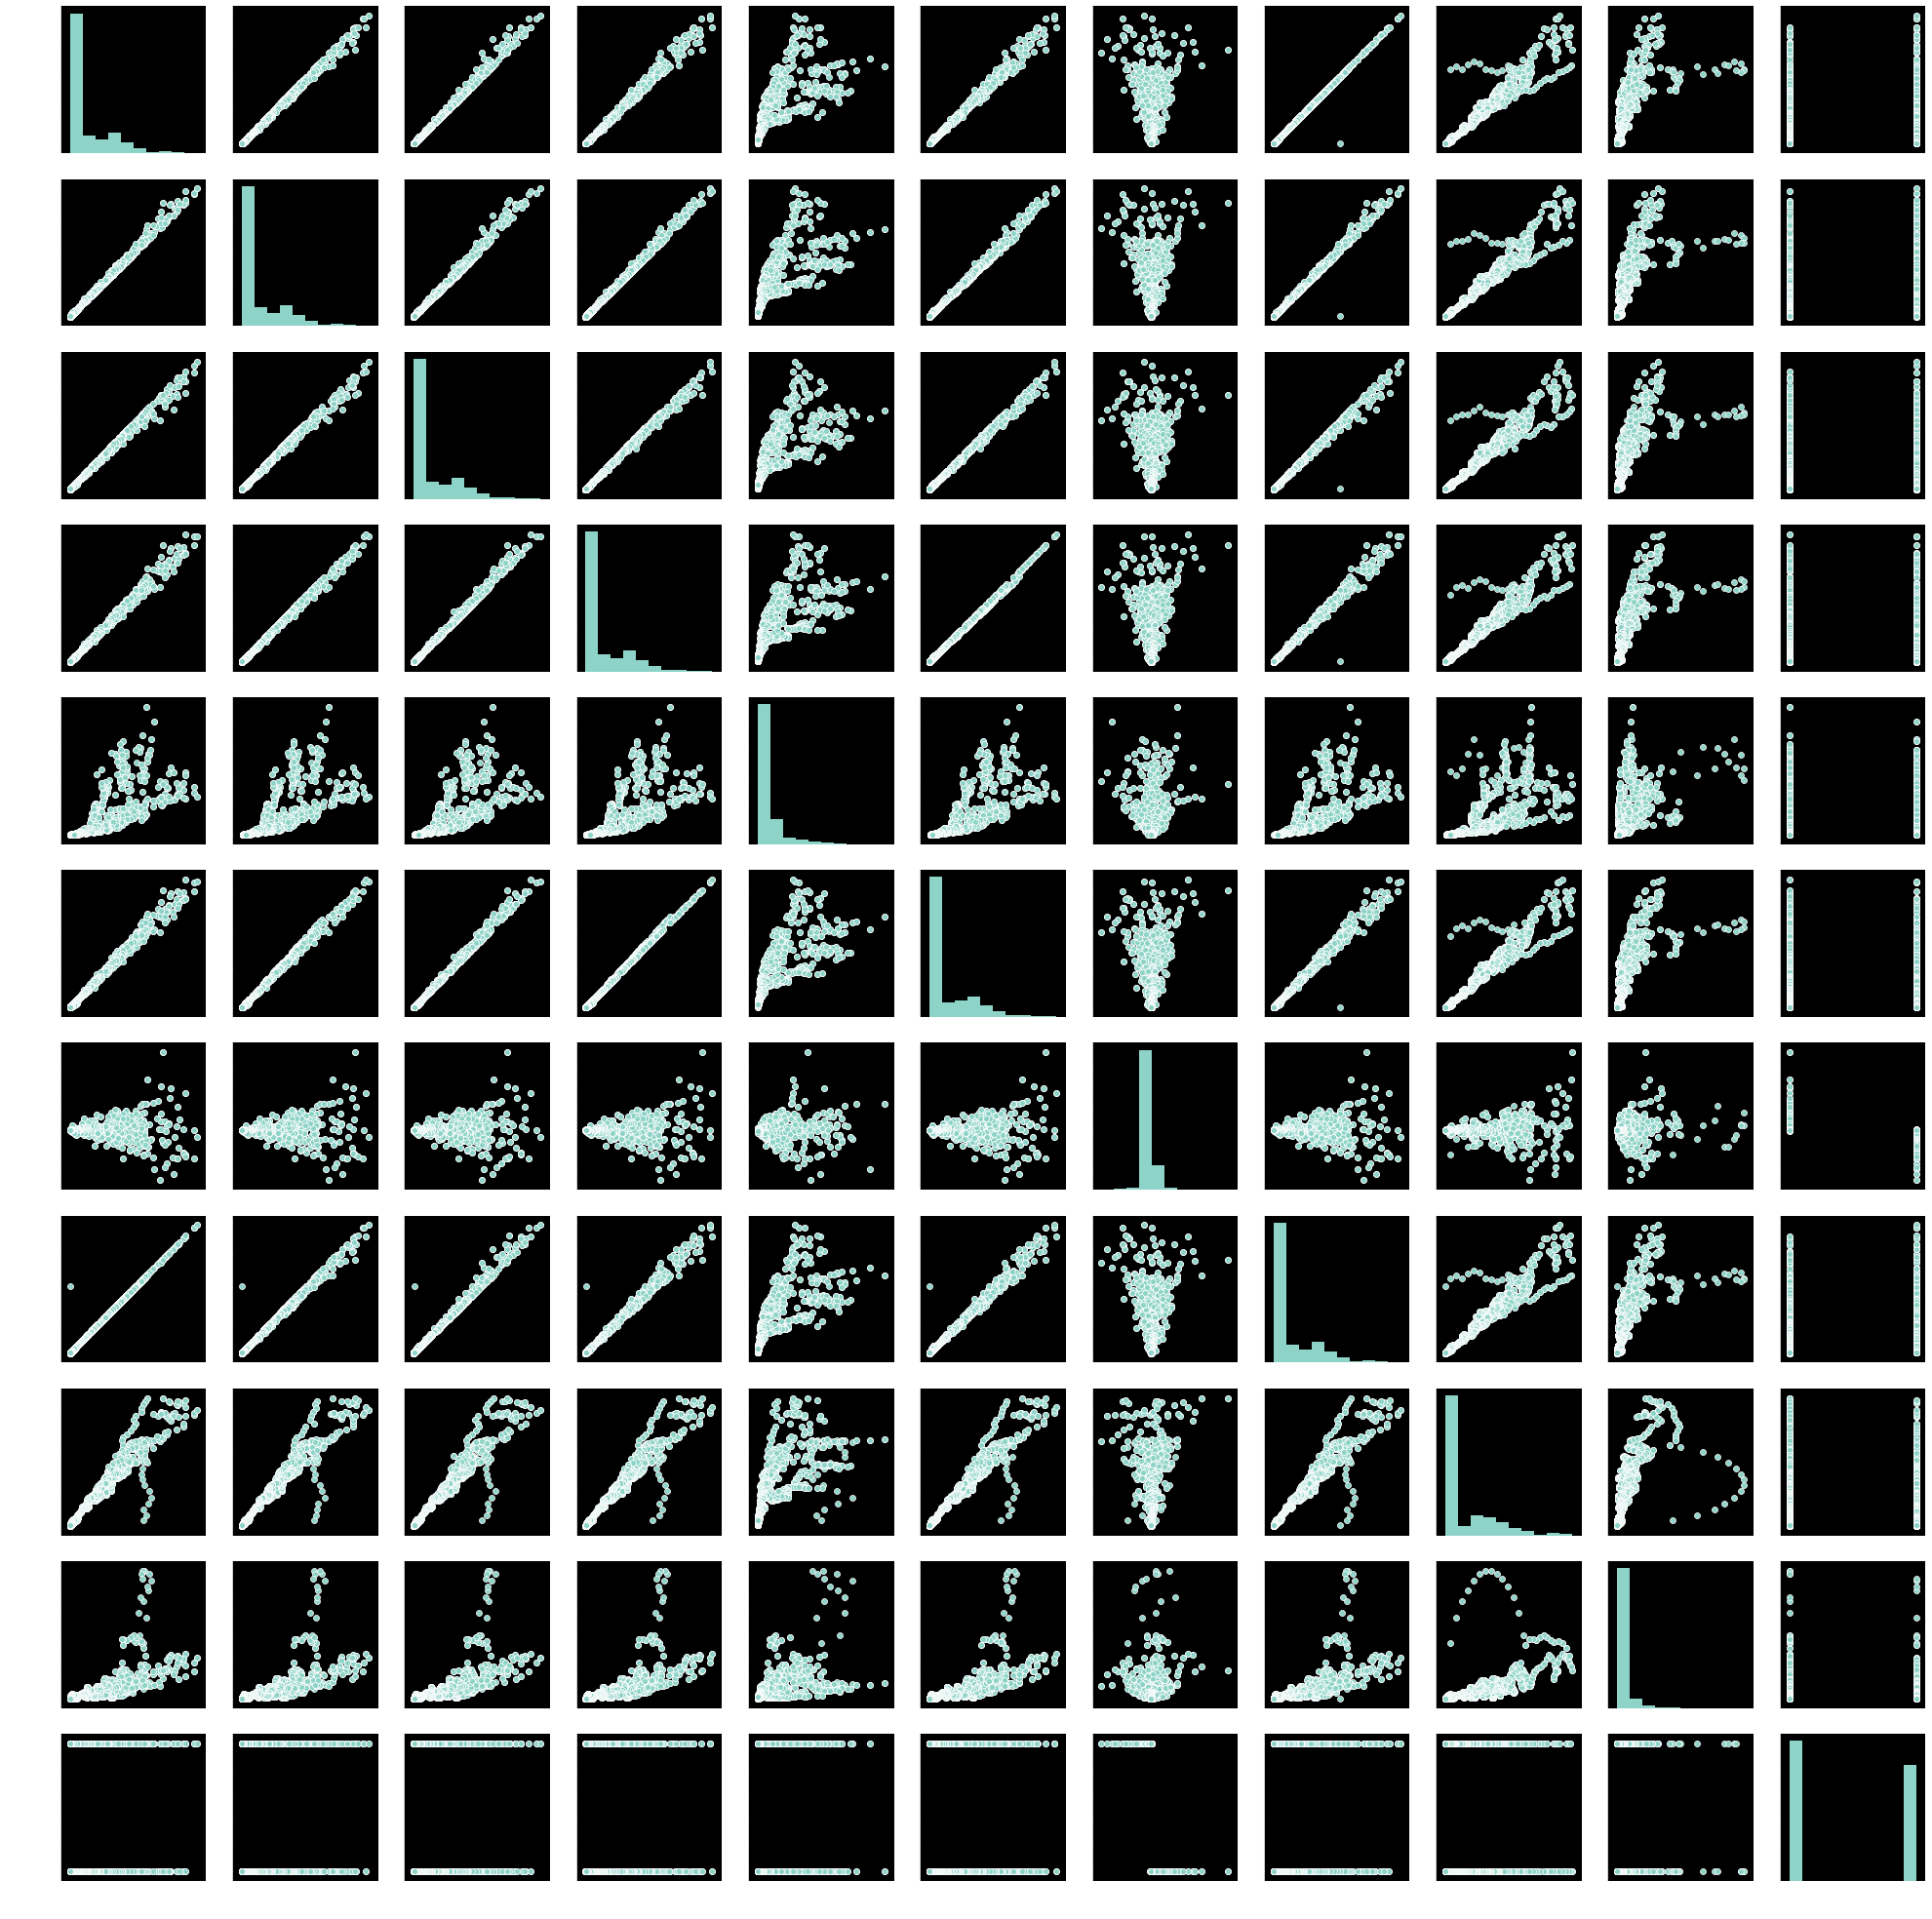

In [175]:
sns.pairplot(df_bitcoin)

In [176]:
auto_correlations = df_bitcoin.corr()
auto_correlations

,Open,High,Low,Close,Volume,Market Cap,Change,Close_Next_Day,15_Day_Rolling_Close,15_Day_Rolling_Close_STD,Price_increase_next_day
Open,1.000000,0.998881,0.998097,0.997579,0.762570,0.997115,-0.020478,0.999081,0.980073,0.727118,0.009012
High,0.998881,1.000000,0.997885,0.999080,0.765906,0.998357,0.017178,0.997965,0.982081,0.732587,-0.003350
Low,0.998097,0.997885,1.000000,0.998735,0.760261,0.998683,0.023485,0.997170,0.981313,0.726350,-0.007729
Close,0.997579,0.999080,0.998735,1.000000,0.763830,0.999513,0.049098,0.996666,0.983038,0.731750,-0.016185
Volume,0.762570,0.765906,0.760261,0.763830,1.000000,0.777419,0.028299,0.762642,0.748092,0.583269,-0.021749
Market Cap,0.997115,0.998357,0.998683,0.999513,0.777419,1.000000,0.048752,0.996208,0.982325,0.730183,-0.016490
Change,-0.020478,0.017178,0.023485,0.049098,0.028299,0.048752,1.000000,-0.020402,0.056661,0.076099,-0.362128
Close_Next_Day,0.999081,0.997965,0.997170,0.996666,0.762642,0.996208,-0.020402,1.000000,0.979139,0.726410,0.009715
15_Day_Rolling_Close,0.980073,0.982081,0.981313,0.983038,0.748092,0.982325,0.056661,0.979139,1.000000,0.709176,-0.023203
15_Day_Rolling_Close_STD,0.727118,0.732587,0.726350,0.731750,0.583269,0.730183,0.076099,0.726410,0.709176,1.000000,-0.034840


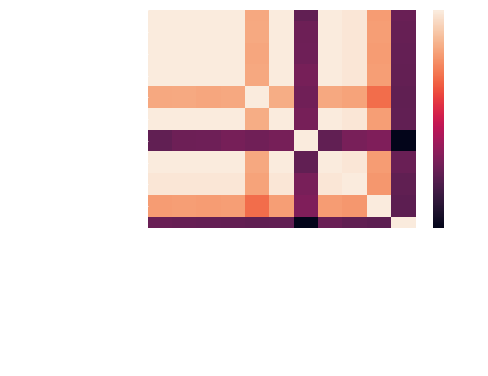

In [177]:
sns.heatmap(auto_correlations)

Text(0, 0.5, 'Price Per Standard Unit, USD')

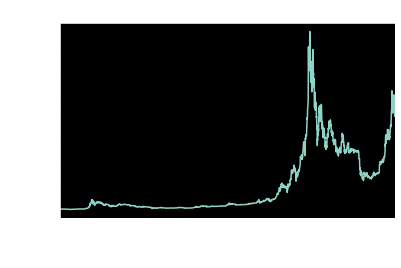

In [178]:
bitcoinOpenPrices = df_bitcoin.Open
bitcoinOpenPrices.plot(title="BTC Price on Coinbase From 2013-04-28 to 2019-07-15")
sns.mpl.pyplot.ylabel("Price Per Standard Unit, USD")


[821.78 818.14 825.14 803.74 775.18 908.11 902.44 913.24 908.17 903.49]
[837.69544033 831.64103271 828.29652255 835.73807976 813.2071984
 784.35253752 923.9632142  912.12503947 923.58892413 917.92887252]
R2: 0.984726
MSE: 740.331655


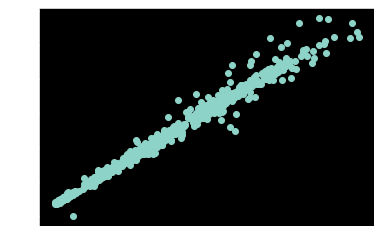

In [179]:
targets = df_bitcoin['Open'].shift(periods=-1).fillna(0).values
features = df_bitcoin[['Open','Close']].values
x_train,x_test, y_train,y_test = train_test_split(features,targets,test_size=0.3,shuffle=False,random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)
y_preds = model.predict(x_test)
print(y_test[0:10])
print(y_preds[0:10])
print("R2: %f" % metrics.r2_score(y_test,y_preds)) 

print("MSE: %f" % metrics.mean_squared_error(y_test,y_preds))
#
plt.scatter(y_preds,
            y_test)
plt.show()

Text(0, 0.5, 'Value Per Standard Unit, USD')

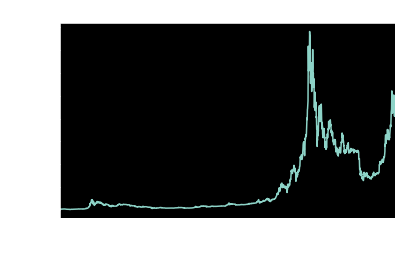

In [180]:
bitcoinPrices = df_bitcoin.Close
bitcoinPrices.plot(title="Bitcoin value over time") #5
sns.mpl.pyplot.ylabel("Value Per Standard Unit, USD") #6


[831.53 821.8  818.41 823.98 804.83 777.76 907.68 902.83 911.2  908.59]
[836.15404523 826.94474159 823.30335188 830.29077727 808.92591263
 780.3944644  913.11140878 907.53932744 918.32018896 913.26337691]
R2: 0.999040
MSE: 46.585247


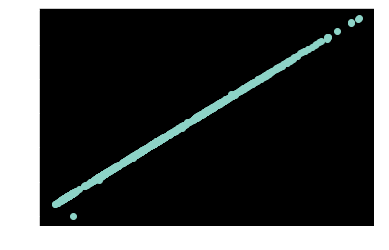

In [181]:
targets = df_bitcoin['Close'].shift(periods=-1).fillna(0).values
features = df_bitcoin[['Open','Close']].values
x_train,x_test, y_train,y_test = train_test_split(features,targets,test_size=0.3,shuffle=False,random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)
y_preds = model.predict(x_test)
print(y_test[0:10])
print(y_preds[0:10])
print("R2: %f" % metrics.r2_score(y_test,y_preds)) 
print("MSE: %f" % metrics.mean_squared_error(y_test,y_preds))
#print("EV: %f" % explained_variance_score(y_test,y_preds))
plt.scatter(y_preds,
            y_test)
plt.show()

In [182]:
coeffs = model.coef_
intercept = model.intercept_

print(intercept)
print(coeffs)

list(zip(features, model.coef_))



5.792769070452323
[9.98537720e-01 6.89867109e-04]


[(array([10257.84, 10895.09]), 0.998537719734089),
 (array([11381.02, 10256.06]), 0.0006898671089198561)]

In [183]:
#generate predictions on training set and evaluate
y_mult_pred_train = model.predict(x_train)
print("Training set RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_mult_pred_train)))

#generate predictions on test set and evaluate
y_mult_pred_test = model.predict(x_test)
print("Test set RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_mult_pred_test)))

Training set RMSE: 179.9463448483896
Test set RMSE: 6.82533859268596


In [188]:
df_bitcoin['target'] = df_bitcoin['Close'].shift(periods=-1)
targets = df_bitcoin.apply(lambda x: 1 if x['target']-x['Close'] > 0 else 0,axis=1).values
features = df_bitcoin[['Open','Close']].values
x_train,x_test, y_train,y_test = train_test_split(features,targets,test_size=0.3,shuffle=False,random_state=42)
logreg = LogisticRegression(solver='lbfgs',n_jobs=-1)
logreg.fit(x_train,y_train)
y_preds = logreg.predict(x_test)
print(y_test[0:10])
print(y_preds[0:10])
print("Acc: %f" % metrics.accuracy_score(y_test,y_preds))
#print(metrics.confusion_matrix(y_test,y_preds))

[0 0 0 1 0 0 1 0 1 0]
[0 0 0 1 0 0 1 0 1 0]
Acc: 0.971366


In [185]:
vals,counts = np.unique(y_test,return_counts=True)
print((vals,counts))
print("Baseline: %0.3f" % (counts[0]/(counts[0]+counts[1])))

(array([0, 1]), array([730, 632]))
Baseline: 0.536


We predict 0 on everything, we’ll get a baseline accuracy of 53.6%